# PREDICT THE VALENCE OF THE TRACKS

Θα αναλύσουμε δίαφορα κομμάτια του spotify κατεβάζοντας τα χαρακτηριστικά του κάθε τραγουδιού με την βοήθεια του API που διαθέτει το spotify.Από τα κομμάτια αυτά θα προσπαθήσουμε να προβλέψουμέ το valence του κάθε κομματιου με την βοήθεια διαφόρων τεχνικών μηχανικής μάθησης και νευρωνικών δικτύων.Το valence είναι ένα χαρακτηριστικό του κάθε τραγουδιού το οποίο μεταφράζεται ως σθένος και πέρνει τιμές απο 0-1.Όσο ποιο μεγάλη η τιμη του σθένους τόσο ποιο "χαρούμενο" το τραγούδι.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns

# IMPORT TRAINING DATA

In [2]:
results = {}
dfs = []
for file in glob.glob('./data/Charts/*/201?/*.csv'):
    region = file.split('/')[3]
    dates = re.findall('\d{4}-\d{2}-\d{2}',file.split('/')[-1])
    weekly_chart = pd.read_csv(file,header=0,sep = '\t')
    weekly_chart['week_start'] = datetime.strptime(dates[0],"%Y-%m-%d")
    weekly_chart['week_end'] = datetime.strptime(dates[1],"%Y-%m-%d")
    weekly_chart["region"] = region
    dfs.append(weekly_chart)
all_charts = pd.concat(dfs)

In [3]:
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region
0,1,0QnEGWGECQUPuE3m8L6hdT,Jaloux,Dadju,1542282,3.0,6,1,2,2018-11-09,2018-11-16,fr
1,2,1Bhm5HNO1cq8olDbBmokyL,Copines,Aya Nakamura,1538486,1.0,2,1,-1,2018-11-09,2018-11-16,fr
2,3,4w8niZpiMy6qz1mntFA5uM,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,1362549,5.0,7,3,2,2018-11-09,2018-11-16,fr
3,4,3aRgAfrt6aQW8IimLq2aVG,La dot,Aya Nakamura,1275798,2.0,2,2,-2,2018-11-09,2018-11-16,fr
4,5,6cKj3bzvVrOQtPfGhcKlRt,Madrina,Maes,1179686,6.0,3,1,1,2018-11-09,2018-11-16,fr
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,146Vb458Y5RbqEa0fYFPzm,Mentira - Ao Vivo,Felipe Araújo,647101,153.0,2,153,-43,2019-12-06,2019-12-13,br
196,197,41GMwa6sCB3iA2aS5T30iE,Trip do Boyzinho,Boyzinho o Rei da Bregadeira,646669,195.0,20,68,-2,2019-12-06,2019-12-13,br
197,198,4u7EnebtmKWzUH433cf5Qv,Bohemian Rhapsody - 2011 Mix,Queen,645988,196.0,36,95,-2,2019-12-06,2019-12-13,br
198,199,2srL4DYBekshpbprS6H0mO,Deixe Me Ir - Acústico,1Kilo,644908,197.0,130,1,-2,2019-12-06,2019-12-13,br


In [4]:
from spotify_config import config
#Spotify API
#Create a config.py file and store in a dictionary the client id and client secret
client_credentials_manager = SpotifyClientCredentials(config["client_id"], 
                                                    config["client_secret"])
sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)

In [5]:
features = {}

In [6]:
#Download data in batches
all_tracks_id = list(all_charts['song_id'].unique())
start = 0 
num_tracks = 100
while start < len(all_tracks_id):
    print(f"Getting from {start} to {start+num_tracks}...")
    tracks_batch = all_tracks_id[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({tracks_id : track_features
                    for tracks_id,track_features in zip(tracks_batch,features_batch)})
    start+=num_tracks
print(f"Features from {len(features)} tracks are downloaded")

Getting from 0 to 100...
Getting from 100 to 200...
Getting from 200 to 300...
Getting from 300 to 400...
Getting from 400 to 500...
Getting from 500 to 600...
Getting from 600 to 700...
Getting from 700 to 800...
Getting from 800 to 900...
Getting from 900 to 1000...
Getting from 1000 to 1100...
Getting from 1100 to 1200...
Getting from 1200 to 1300...
Getting from 1300 to 1400...
Getting from 1400 to 1500...
Getting from 1500 to 1600...
Getting from 1600 to 1700...
Getting from 1700 to 1800...
Getting from 1800 to 1900...
Getting from 1900 to 2000...
Getting from 2000 to 2100...
Getting from 2100 to 2200...
Getting from 2200 to 2300...
Getting from 2300 to 2400...
Getting from 2400 to 2500...
Getting from 2500 to 2600...
Getting from 2600 to 2700...
Getting from 2700 to 2800...
Getting from 2800 to 2900...
Getting from 2900 to 3000...
Getting from 3000 to 3100...
Getting from 3100 to 3200...
Getting from 3200 to 3300...
Getting from 3300 to 3400...
Getting from 3400 to 3500...
Gettin

In [7]:
#Create a Dataframe with the data
tracks = pd.DataFrame.from_dict(features,orient='index')
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0QnEGWGECQUPuE3m8L6hdT,0.558,0.797,8,-3.890,0,0.0739,0.193,0.000000,0.3990,0.368,139.992,audio_features,0QnEGWGECQUPuE3m8L6hdT,spotify:track:0QnEGWGECQUPuE3m8L6hdT,https://api.spotify.com/v1/tracks/0QnEGWGECQUP...,https://api.spotify.com/v1/audio-analysis/0QnE...,233986,4
1Bhm5HNO1cq8olDbBmokyL,0.701,0.787,8,-3.941,0,0.0855,0.270,0.000000,0.1050,0.904,180.027,audio_features,1Bhm5HNO1cq8olDbBmokyL,spotify:track:1Bhm5HNO1cq8olDbBmokyL,https://api.spotify.com/v1/tracks/1Bhm5HNO1cq8...,https://api.spotify.com/v1/audio-analysis/1Bhm...,171720,4
4w8niZpiMy6qz1mntFA5uM,0.842,0.801,8,-4.167,0,0.2280,0.157,0.000005,0.0642,0.617,95.881,audio_features,4w8niZpiMy6qz1mntFA5uM,spotify:track:4w8niZpiMy6qz1mntFA5uM,https://api.spotify.com/v1/tracks/4w8niZpiMy6q...,https://api.spotify.com/v1/audio-analysis/4w8n...,212500,4
3aRgAfrt6aQW8IimLq2aVG,0.448,0.513,0,-6.108,1,0.1630,0.203,0.000000,0.0947,0.751,82.451,audio_features,3aRgAfrt6aQW8IimLq2aVG,spotify:track:3aRgAfrt6aQW8IimLq2aVG,https://api.spotify.com/v1/tracks/3aRgAfrt6aQW...,https://api.spotify.com/v1/audio-analysis/3aRg...,201720,4
6cKj3bzvVrOQtPfGhcKlRt,0.734,0.824,11,-5.201,0,0.0554,0.206,0.050700,0.3610,0.673,122.997,audio_features,6cKj3bzvVrOQtPfGhcKlRt,spotify:track:6cKj3bzvVrOQtPfGhcKlRt,https://api.spotify.com/v1/tracks/6cKj3bzvVrOQ...,https://api.spotify.com/v1/audio-analysis/6cKj...,220213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5FFpRbsH9WDYNoLauRAHpj,0.744,0.794,6,-4.409,0,0.0836,0.293,0.002070,0.0994,0.717,90.070,audio_features,5FFpRbsH9WDYNoLauRAHpj,spotify:track:5FFpRbsH9WDYNoLauRAHpj,https://api.spotify.com/v1/tracks/5FFpRbsH9WDY...,https://api.spotify.com/v1/audio-analysis/5FFp...,133333,4
36P6ptTyxOggYgR2aoZiAl,0.642,0.874,3,-3.162,1,0.1280,0.439,0.000000,0.0821,0.829,164.810,audio_features,36P6ptTyxOggYgR2aoZiAl,spotify:track:36P6ptTyxOggYgR2aoZiAl,https://api.spotify.com/v1/tracks/36P6ptTyxOgg...,https://api.spotify.com/v1/audio-analysis/36P6...,158662,4
3ZkTtSBN1wcSw35F8GDRmr,0.805,0.877,1,-2.978,0,0.0449,0.265,0.000000,0.2810,0.802,126.941,audio_features,3ZkTtSBN1wcSw35F8GDRmr,spotify:track:3ZkTtSBN1wcSw35F8GDRmr,https://api.spotify.com/v1/tracks/3ZkTtSBN1wcS...,https://api.spotify.com/v1/audio-analysis/3ZkT...,189866,4
3dPvQLKl42dMYWV4LWRTLK,0.775,0.886,6,-6.680,0,0.0476,0.589,0.000008,0.0991,0.939,172.013,audio_features,3dPvQLKl42dMYWV4LWRTLK,spotify:track:3dPvQLKl42dMYWV4LWRTLK,https://api.spotify.com/v1/tracks/3dPvQLKl42dM...,https://api.spotify.com/v1/audio-analysis/3dPv...,203076,4


In [8]:
tracks = tracks.reset_index(drop=True).rename(columns={'id':'song_id'})
tracks = tracks.drop(columns=['uri','track_href','analysis_url','type']) #drop the unnecessary columns
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_id,duration_ms,time_signature
0,0.558,0.797,8,-3.890,0,0.0739,0.193,0.000000,0.3990,0.368,139.992,0QnEGWGECQUPuE3m8L6hdT,233986,4
1,0.701,0.787,8,-3.941,0,0.0855,0.270,0.000000,0.1050,0.904,180.027,1Bhm5HNO1cq8olDbBmokyL,171720,4
2,0.842,0.801,8,-4.167,0,0.2280,0.157,0.000005,0.0642,0.617,95.881,4w8niZpiMy6qz1mntFA5uM,212500,4
3,0.448,0.513,0,-6.108,1,0.1630,0.203,0.000000,0.0947,0.751,82.451,3aRgAfrt6aQW8IimLq2aVG,201720,4
4,0.734,0.824,11,-5.201,0,0.0554,0.206,0.050700,0.3610,0.673,122.997,6cKj3bzvVrOQtPfGhcKlRt,220213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,0.744,0.794,6,-4.409,0,0.0836,0.293,0.002070,0.0994,0.717,90.070,5FFpRbsH9WDYNoLauRAHpj,133333,4
13876,0.642,0.874,3,-3.162,1,0.1280,0.439,0.000000,0.0821,0.829,164.810,36P6ptTyxOggYgR2aoZiAl,158662,4
13877,0.805,0.877,1,-2.978,0,0.0449,0.265,0.000000,0.2810,0.802,126.941,3ZkTtSBN1wcSw35F8GDRmr,189866,4
13878,0.775,0.886,6,-6.680,0,0.0476,0.589,0.000008,0.0991,0.939,172.013,3dPvQLKl42dMYWV4LWRTLK,203076,4


# IMPORT TEST DATA

In [9]:
test_data_tracks_ids = pd.read_csv("./data/spotify_ids.txt",names=['song_id'])
test_data_tracks_ids

,song_id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


In [10]:
#Download the features of the test tracks
test_tracks_features = {}
start = 0 
num_tracks = len(test_data_tracks_ids)//14 # 1162 / 14 = 83 tracks per batch
while start < len(test_data_tracks_ids):
    print(f"Getting from {start} to {start+num_tracks}...")
    tracks_batch = test_data_tracks_ids['song_id'].iloc()[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    test_tracks_features.update({track_id : track_features
                               for track_id,track_features in zip(tracks_batch,features_batch)})
    start+=num_tracks
    
print(f"Features from {len(test_tracks_features)} tracks are downloaded")

Getting from 0 to 83...
Getting from 83 to 166...
Getting from 166 to 249...
Getting from 249 to 332...
Getting from 332 to 415...
Getting from 415 to 498...
Getting from 498 to 581...
Getting from 581 to 664...
Getting from 664 to 747...
Getting from 747 to 830...
Getting from 830 to 913...
Getting from 913 to 996...
Getting from 996 to 1079...
Getting from 1079 to 1162...
Features from 1162 tracks are downloaded


In [11]:
test_tracks = pd.DataFrame.from_dict(test_tracks_features,orient='index')
test_tracks = test_tracks.reset_index(drop=True).rename(columns={'id': 'song_id'})
test_tracks = test_tracks.drop(columns=['type','uri','track_href',"analysis_url"])
test_tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_id,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,7lPN2DXiMsVn7XUKtOW1CS,242014,4
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,5QO79kh1waicV47BqGRL3g,215627,4
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,200040,4
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,4MzXwWMhyBbmu6hOcLVD49,205090,4
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,5Kskr9LcNYa0tpt5f0ZEJx,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,4lUmnwRybYH7mMzf16xB0y,257428,4
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,1fzf9Aad4y1RWrmwosAK5y,187310,4
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,3E3pb3qH11iny6TFDJvsg5,209299,4
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,3yTkoTuiKRGL2VAlQd7xsC,202204,4


<AxesSubplot:>

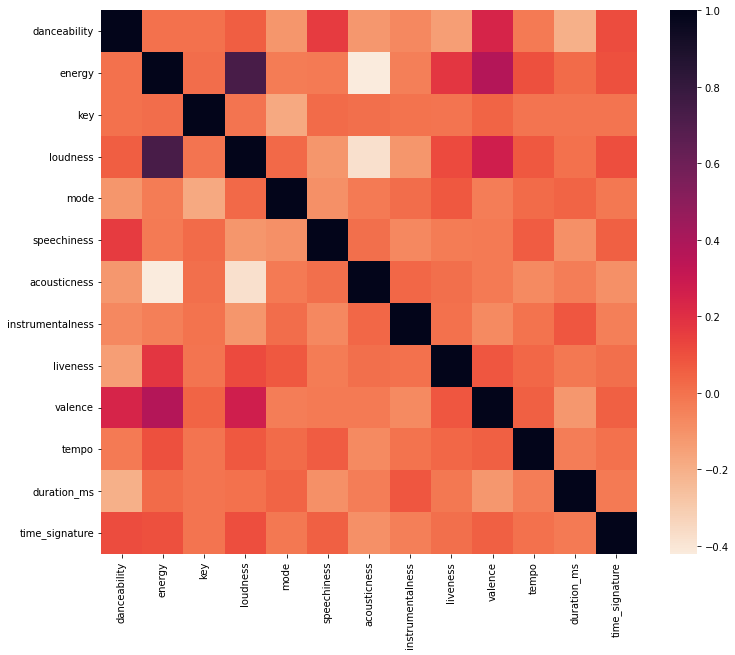

In [12]:
#Create a heatmap to see the correlation between the columns 
plt.figure(figsize=(12,10))
sns.heatmap(tracks.corr(),cmap='rocket_r')

Από το διάγραμμά παρατηρούμε πως υπάρχει μια συσχέτιση μεταξύ του loudness-valence, energy-valence 

# MACHINE LEARNING 

Για την προσπάθεια της πρόβλεψης του valence θα δοκιμάσουμε διάφορα μοντέλα μηχανικής μάθησης και ένα νευρονικό δικτύο τα οποία χρησιμοποιούνται σε προβλήματα παλλινδρόμησης και θα αξιολογούμε την πρόβλεψη με βάση το μέσο απόλυτο λάθος.

## 1. LINEAR REGRESSION

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
#Create a LinearRegression model 
model = LinearRegression()
scaler = StandardScaler() #Create a scaler for the data to normalize them
x_train,x_test,y_train,y_test = train_test_split(tracks.drop(columns=['valence','song_id']),
                                                 tracks['valence'],test_size=.2)
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test) 


In [15]:
model.fit(x_train_scaled,y_train) #train the model

LinearRegression()

In [16]:
predicted = model.predict(x_test_scaled)

In [17]:
#Evaluate the model with mean absolute error
LR_mean_absolute_error = mean_absolute_error(y_test,predicted)
print(f"Mean absolute error is : {LR_mean_absolute_error}")

Mean absolute error is : 0.15232611584344152


In [18]:
#Now train the model with all the data
x_train = scaler.fit_transform(tracks.drop(columns=['valence','song_id']))
y_train = tracks['valence']
model.fit(x_train,y_train)
#Test it with new unknown data to predict the valence
test_new_data = test_tracks.drop(columns=['valence','song_id'])
test_new_data_scaled = scaler.transform(test_new_data)

In [19]:
LR_test_predicted = model.predict(test_new_data_scaled)
LR_mean_absolute_error = mean_absolute_error(np.array(test_tracks['valence']),LR_test_predicted)
print(f"Mean absolute error for the new tracks is : {LR_mean_absolute_error}")

Mean absolute error for the new tracks is : 0.1604252609772511


In [20]:
results.update({"Linear Regression" : LR_mean_absolute_error})

Από τα αποτελέσματα βλέπουμε πως η πρόβλεψη με το μοντέλο της γραμμικής παλλινδρόμησης είναι αρκετά καλή

## 2. RANDOM FOREST

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor, StackingRegressor

Θα δοκιμάσουμε διάφορα μοντέλα που χρησιμοποιούν το την λογική του δένδρου απόφασης.

### DECISION TREE

In [22]:
#Find the optimal depth of the tree
parameters = [
    {"max_depth":list(range(1,11))}
]
regressor = GridSearchCV(DecisionTreeRegressor(),parameters,cv=KFold(n_splits=5,shuffle=True))
regressor.fit(tracks.drop(columns=["valence","song_id"]),tracks['valence'])
print(regressor.best_estimator_)

DecisionTreeRegressor(max_depth=6)


In [23]:
#Create the decisiontree model
reg_tree = DecisionTreeRegressor(max_depth=regressor.best_params_.get("max_depth"))
#Evaluate the model during training with cross validation technique
cv_scores = cross_val_score(reg_tree,
                            tracks.drop(columns=["valence","song_id"]),
                            tracks['valence'],
                            cv=KFold(n_splits=5,shuffle=True),
                            scoring="neg_mean_absolute_error",
                            n_jobs=-1)
print(f"Decision Tree Regressor ------ > Mean absolute error is : {-cv_scores.mean()}")

Decision Tree Regressor ------ > Mean absolute error is : 0.15574902103955063


### BAGGING REGRESSOR

In [24]:
#Create the bagging tree model
bagging_reg_tree = BaggingRegressor(DecisionTreeRegressor(),n_estimators=50,n_jobs=-1)
#Evaluate the model during training with cross validation technique
bagged_cv_scores = cross_val_score(bagging_reg_tree,
                                   tracks.drop(columns=["valence","song_id"]),
                                   tracks['valence'],
                                   cv=KFold(n_splits=5,shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(f"Bagging Regressor ------ > Mean absolute error is : {-bagged_cv_scores.mean()}")

Bagging Regressor ------ > Mean absolute error is : 0.13215564735830929


### RANDOM FOREST

In [25]:
#Create the random forest model
random_reg_forest = RandomForestRegressor(n_estimators=50,n_jobs=-1)
#Evaluate the model during training with cross validation technique
random_forest_cv_scores = cross_val_score(random_reg_forest,
                                   tracks.drop(columns=["valence","song_id"]),
                                   tracks['valence'],
                                   cv=KFold(n_splits=5,shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(f"Random Forest Regressor ------ > Mean absolute error is : {-random_forest_cv_scores.mean()}")

Random Forest Regressor ------ > Mean absolute error is : 0.13193565782901057


### EXTRA RANDOM FOREST

In [26]:
#Create the extra random forest model
extra_random_reg_forest = ExtraTreesRegressor(n_estimators=50, n_jobs= -1)
#Evaluate the model during training with cross validation technique
extra_forest_cv_scores =  cross_val_score(extra_random_reg_forest,
                                   tracks.drop(columns=["valence","song_id"]),
                                   tracks['valence'],
                                   cv=KFold(n_splits=5,shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(f"Extra Random Forest Regressor ------ > Mean absolute error is : {-extra_forest_cv_scores.mean()}")

Extra Random Forest Regressor ------ > Mean absolute error is : 0.12403377752161386


### ADA BOOST 

In [27]:
#Create the ada boost model
ada_boost_regressor = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=50)
#Evaluate the model during training with cross validation technique
ada_boost_cv_scores =  cross_val_score(ada_boost_regressor,
                                   tracks.drop(columns=["valence","song_id"]),
                                   tracks['valence'],
                                   cv=KFold(n_splits=5,shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(f"Ada Boost Regressor ------ > Mean absolute error is : {-ada_boost_cv_scores.mean()}")

Ada Boost Regressor ------ > Mean absolute error is : 0.12212476945244957


### XGB 

In [28]:
#Create the xgb model
xgb_regressor = XGBRegressor()
#Evaluate the model during training with cross validation technique
xgb_cv_scores = cross_val_score(xgb_regressor,
                                   tracks.drop(columns=["valence","song_id"]),
                                   tracks['valence'],
                                   cv=KFold(n_splits=5,shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(f"XGBoost Regressor ------ > Mean absolute error is : {-xgb_cv_scores.mean()}")

XGBoost Regressor ------ > Mean absolute error is : 0.14036161555084806


### LIGHTGBM

In [29]:
#Create the lgbm model
lgbm_regressor = LGBMRegressor()
#Evaluate the model during training with cross validation technique
lgbm_cv_scores = cross_val_score(lgbm_regressor,
                                   tracks.drop(columns=["valence","song_id"]),
                                   tracks['valence'],
                                   cv=KFold(n_splits=5,shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(f"LGBM Regressor ------ > Mean absolute error is : {-lgbm_cv_scores.mean()}")

LGBM Regressor ------ > Mean absolute error is : 0.14074491682226284


### VOTING REGRESSOR

In [30]:
#Create the voting model
#Using Adaboost and Extratree models 
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=50)
extra_forest = ExtraTreesRegressor(n_estimators=50,n_jobs=-1)
vreg = VotingRegressor(estimators=[("ada",ada_boost),
                                  ("extra",extra_forest)],n_jobs=-1)
#Evaluate the model during training with cross validation technique
voting_cv_scores = cross_val_score(vreg,
                                   tracks.drop(columns=["valence","song_id"]),
                                   tracks["valence"],
                                   cv=KFold(n_splits=5,shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(f"Voting Regressor ------ > Mean absolute error is : {-voting_cv_scores.mean()}")

Voting Regressor ------ > Mean absolute error is : 0.1215663522334294


### STACKING REGRESSOR

In [31]:
#Create the stacking model
#Using Adaboost and Extratree models 
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=50)
extra_forest = ExtraTreesRegressor(n_estimators=50,n_jobs=-1)
estimators=[("ada",ada_boost),("extra",extra_forest)]
final_estimator = LinearRegression()
sreg = StackingRegressor(estimators=estimators,final_estimator=final_estimator,n_jobs=-1)
#Evaluate the model during training with cross validation technique
stacking_cv_scores = cross_val_score(sreg,
                                     tracks.drop(columns=["valence","song_id"]),
                                     tracks["valence"],
                                     cv=KFold(n_splits=5,shuffle=True),
                                     scoring="neg_mean_absolute_error",
                                     n_jobs=-1)
print(f"Stacking Regressor ------ > Mean absolute error is : {-stacking_cv_scores.mean()}")

Stacking Regressor ------ > Mean absolute error is : 0.12261417022822108


Απο τα αποτελέσματα βλέπουμε πως την καλύτερη πρόβλεψη την κάνει o voting regressor οπότε θα χρησιμοποιήσουμε αυτόν για την πρόβλεψη του valence των νέων κομματίων 

In [32]:
#Train the model with all train dataset 
vreg.fit(tracks.drop(columns=["valence","song_id"]),tracks["valence"])
#Predict the valence of the new tracks
vreg_predicted = vreg.predict(test_new_data)
forest_mean_absolute_error = mean_absolute_error(test_tracks["valence"],vreg_predicted)
print(f"Mean absolute error for the new tracks is : {forest_mean_absolute_error}")

Mean absolute error for the new tracks is : 0.13081036660929432


Τα αποτελέσματα των προβλέψεων είναι πολύ καλά

In [33]:
results.update({"Random Forest" : forest_mean_absolute_error})

## 3.SUPPORT VECTOR MACHINE

Θα χρησιμοποιήσουμε μια τεχνική απο το μοντελο Support Vector Machine η οποία χρησιμοποιείται για προβλματα παλλινδρόμησης και λέγεται Support Vector Regressor

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


x_train,x_test,y_train,y_test = train_test_split(tracks.drop(columns=["valence","song_id"]),
                                                 tracks["valence"],
                                                 test_size=.2)
param_grid = [
    {
        "kernel" : ["rbf"],
        "gamma" : [1e-1,1e-2,1e-3,1e-4],
        "C" : [1,10,50,100,100]
    }
]


svreg = SVR()
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
#Search for the best estimator for the model
grid_search = GridSearchCV(svreg,param_grid=param_grid,n_jobs=-1)
grid_search.fit(x_train_scaled,y_train)



GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 50, 100, 100],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [35]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [36]:
#Create the SVR model
svreg = SVR(C=grid_search.best_params_.get("C"),gamma=grid_search.best_params_.get("gamma"))
#Train the model
svreg.fit(x_train_scaled,y_train)
predicted = svreg.predict(x_test_scaled)
sreg_mean_absolute_error = mean_absolute_error(y_test,predicted)
print(f"Mean absolute error is : {sreg_mean_absolute_error}")

Mean absolute error is : 0.14592397195510087


In [37]:
#Create the model
#Train with all the train dataset
svreg = SVR(C=grid_search.best_params_.get("C"),gamma=grid_search.best_params_.get("gamma"))
svreg.fit(tracks.drop(columns=["valence","song_id"]),tracks["valence"])
#Predict the valence of the new tracks
svreg_predicted = svreg.predict(test_new_data_scaled)
#evaluate the model
svr_mean_absolute_error = mean_absolute_error(test_tracks["valence"],svreg_predicted)
print(f"Mean absolute error for the new tracks is : {svr_mean_absolute_error}")

/home/pantel/Desktop/Spotify_analysis/Spotify_analysis/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Mean absolute error for the new tracks is : 0.19558341828036105


Εδώ βλέπουμε πως τα αποτελέσματα των προβλέψεων δεν είναι και τόσο καλα

In [38]:
results.update({"SVR" : svr_mean_absolute_error})

## 4.KNN

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline


Θα χρησιμοποιήσουμε τον k nearest neighbors, έναν αλγόριθμο που χρησιμοποιείται κυρίως για κατηγοριοποίηση αλλα μπορεί να χρησιμοποιείθει και σε προβλήματα παλλινδρόμησης

In [40]:
x_train,x_test,y_train,y_test = train_test_split(tracks.drop(columns=["valence","song_id"]),
                                                 tracks["valence"],
                                                test_size=.2)
#Create a loop to find the optimal n_neighbors
scores = {} #Keep history of the mse of the models
for i in range(5,30):
    knn = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=i))
    knn.fit(x_train,y_train)
    predicted = knn.predict(x_test)
    score = mean_absolute_error(y_test,predicted)
    scores.update({i:score})
    
    
    

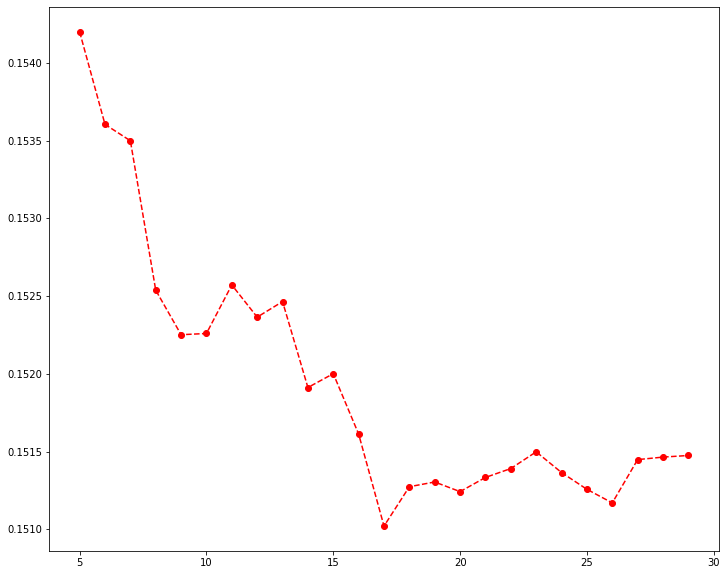

In [41]:
plt.figure(figsize=(12,10))
plt.plot(scores.keys(),scores.values(),c="r",marker="o",ls='--')

Στο διαγραμμα παρατηρούμε πως ανάλογα με το k επιρεάζεται και το μεσο απόλυτο λάθος.Για την εκπαίδεση του μοντέλου μας θα πάρουμε το k με το ελάχιστο σφάλμα δηλαδή το σημείο που βρίσκεται στο χαμηλότερο σημείο στο διάγραμμα

In [43]:
#make a pipeline to normalize and train the regressor
knn = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=min(scores,key=scores.get)))
#train the model with all train dataset
knn.fit(tracks.drop(columns=["valence","song_id"]),tracks["valence"])
#predict the valence of the new tracks
knn_predicted = knn.predict(test_new_data_scaled)
#evaluate the model
knn_mean_absolute_error = mean_absolute_error(test_tracks["valence"],knn_predicted)
print(f"Mean absolute error for the new tracks is : {knn_mean_absolute_error}")

Mean absolute error for the new tracks is : 0.23106337956869494


/home/pantel/Desktop/Spotify_analysis/Spotify_analysis/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Εδω οι προβλέψεις δεν είναι και τόσο καλές

In [44]:
results.update({"KNN" : knn_mean_absolute_error})

## 5.NEURAL NETWORK

In [50]:
import tensorflow as tf
from tensorflow import keras


In [51]:
x_train,x_test,y_train,y_test = train_test_split(tracks.drop(columns=["valence","song_id"]),
                                                 tracks["valence"],
                                                 test_size=.2)

Θα δημιουργήσουμαι ένα νευρωνικό δικτυο 

In [52]:
#Create a layer for normalization
normalizer = keras.layers.Normalization()
#feed the layer with data 
normalizer.adapt(x_train)



#Create the model
model = keras.Sequential([
    normalizer,
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dropout(.4),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(32, activation = "elu"),
    keras.layers.Dense(1, activation = "sigmoid")])

Το νευρωνικό που δημιουργήσαμε έχει 6 στρώματα:
1.Το στρώμα που κάνει κανονικοποίηση στα δεδομένα εισόδου

2.Ενα πυκνα συνδεδεμένο στρώμα με 300 νευρώνες και συνάρτηση ενεργοποίησης την relu οι οποία ενδύκνεται για hidden layers

3.Ενα στρώμα dropout το οποίο σε κάθε φορά που εκπαιδέυεται το δύκτιο θα αποκόπτει τις συνδέσεις του 40% των νευρώνων με σκοπό να εμποδίσει την υπερπροσαρμογή του δυκτίου

4.Ενα πυκνα συνδεδεμένο στρώμα με 300 νευρώνες και συνάρτηση ενεργοποίησης την relu οι οποία ενδύκνεται για hidden layers

5.Ενα πυκνα συνδεδεμένο στρώμα με 32 νευρώνες και συνάρτηση ενεργοποίησης την elu οι οποία ενδύκνεται για hidden layers.Η διαφορά απο την relu είναι πως μπορεί να πάρει κατώτερη τιμή μέχρι -1 ενώ η relu μέχρι 0.Χρησιμοποιήθηκε επείδη έιχει αυτή την ιδιαιτερότητα και μπορεί να πάρει αρνητική τιμή ώστε να δώσουμε στο δικτύο εναν βαθμό ελευθεριας παραπάνω σε περίπτωση που αντιληφθει πως κάποια δεδομένα είναι αντιστρόφος ανάλογα με το valence

6.Στο τελευταίο στρώμα βάζουμε έναν νευρώνα ο οποίος θα μας δίνει ως έξοδο την πρόβλεψη του σθένους.Χρησιμοποιούμε την συνάρτηση ενεργοποίησης sigmoid διότι πάει απο το 0 εώς το 1. 

In [53]:
#compile the model
model.compile(loss="mean_absolute_error",
              optimizer = keras.optimizers.Adam(.001),
              )

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 300)               3900      
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 32)                9632      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                      

In [55]:
#Create an earlystop function to stop the training when the validation loss dont change
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)

In [56]:
model.fit(x_train,y_train,epochs=1000,validation_split=.2,callbacks=[earlystop])

Epoch 1/1000
278/278 [==============================] - 1s 2ms/step - loss: 0.1564 - val_loss: 0.1507
Epoch 2/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1488
Epoch 3/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1498
Epoch 4/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1472
Epoch 5/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1471
Epoch 6/1000
278/278 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.1475
Epoch 7/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.1469
Epoch 8/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1476
Epoch 9/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1454 - val_loss: 0.1466
Epoch 10/1000
278/278 [==============================] - 0s 1ms/step - loss: 0.145

In [57]:
print(f"Mean absolute error is : {model.evaluate(x_test,y_test,verbose=0)}")

Mean absolute error is : 0.14607703685760498


In [328]:
#train the model with all train dataset
model.fit(tracks.drop(columns=["valence","song_id"]),
          tracks["valence"],
          batch_size=40,
          epochs=1000,
          validation_split=.2,
          callbacks=[earlystop])

Epoch 1/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1352 - val_loss: 0.1350
Epoch 2/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.1357
Epoch 3/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1323 - val_loss: 0.1364
Epoch 4/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1319 - val_loss: 0.1380
Epoch 5/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1314 - val_loss: 0.1364
Epoch 6/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1305 - val_loss: 0.1363
Epoch 7/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1302 - val_loss: 0.1405
Epoch 8/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1296 - val_loss: 0.1357
Epoch 9/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.1292 - val_loss: 0.1387
Epoch 10/1000
278/278 [==============================] - 0s 2ms/step - loss: 0.128

In [58]:
#Predict the valence of the new tracks
predicted_NN = model.predict(test_new_data)

In [59]:
#Evaluate the model wiht mean absolute error
NN_mean_absolute_error = mean_absolute_error(test_tracks["valence"],predicted_NN)
print(f"Mean absolute error for the new tracks is : {NN_mean_absolute_error}")

Mean absolute error for the new tracks is : 0.15232824417576324


In [60]:
results.update({"Neural Network" : NN_mean_absolute_error})

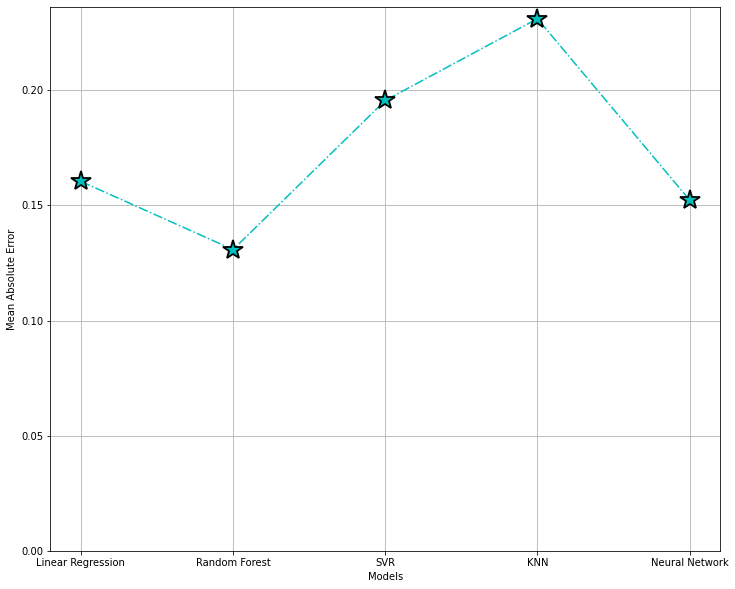

In [61]:
#Create a plot to visualize the mse of the models
plt.figure(figsize=(12,10))
plt.plot(results.keys(),results.values(),c="c",marker="*",markersize=20,mec="k",mew=1.8,ls="-.")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Models")
plt.ylim(ymin=0)
plt.grid()

Μετά το τέλος της ανάλυσης παρατηρούμε πως το καλύτερο μοντέλο στην περιπτωσή μας ειναι τα τυχαία δάση.Μετα ακολουθεί το νευρωνικό δίκτυο , μετά το μοντέλο της γραμμικής παλλινδρόμησης, μετά το Support vector regressor και τέλος το μοντέλο του KNN.

Το συμπέρασμα είναι πως τα νευρωνικά δίκτυα είναι πάρα πολύ δυνατά εργαλεία πρόβλεψης αλλά δεν είναι πανάκεια.Πολλές φορές όπως και στην περίπτωσή μας τα δάση δουλεύουν καλύτερα.Θα πρέπει να γίνεται δοκιμή αρκετών αλγορίθμων και υπερπαραμέτρων για την εύρεση του βέλτιστου μοντέλου.